In [17]:
import os
os.getcwd()

'/home/florinacho/deepskill/notebooks'

In [18]:
import pandas

df = pandas.read_csv("../data/processed/lichess_db_standard_rated_2013-06.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20175 entries, 0 to 20174
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            20175 non-null  object 
 1   White            20175 non-null  object 
 2   Black            20175 non-null  object 
 3   Result           20175 non-null  object 
 4   BlackElo         20175 non-null  object 
 5   WhiteElo         20175 non-null  object 
 6   BlackRatingDiff  20122 non-null  float64
 7   WhiteRatingDiff  20122 non-null  float64
 8   Opening          20175 non-null  object 
 9   Termination      20175 non-null  object 
 10  TimeControl      20175 non-null  object 
 11  UTCDate          20175 non-null  object 
 12  UTCTime          20175 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.0+ MB


In [19]:
df = df[df["BlackElo"] != "?"]
df = df[df["WhiteElo"] != "?"]

df["BlackElo"] = df["BlackElo"].astype('int')
df["WhiteElo"] = df["WhiteElo"].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 0 to 20174
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            20122 non-null  object 
 1   White            20122 non-null  object 
 2   Black            20122 non-null  object 
 3   Result           20122 non-null  object 
 4   BlackElo         20122 non-null  int64  
 5   WhiteElo         20122 non-null  int64  
 6   BlackRatingDiff  20122 non-null  float64
 7   WhiteRatingDiff  20122 non-null  float64
 8   Opening          20122 non-null  object 
 9   Termination      20122 non-null  object 
 10  TimeControl      20122 non-null  object 
 11  UTCDate          20122 non-null  object 
 12  UTCTime          20122 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2.1+ MB


In [20]:
white_wins = df[df["Result"] == "1-0"]
draws = df[df["Result"] == "1/2-1/2"]
black_wins = df[df["Result"] == "0-1"]

white_wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10318 entries, 0 to 20173
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            10318 non-null  object 
 1   White            10318 non-null  object 
 2   Black            10318 non-null  object 
 3   Result           10318 non-null  object 
 4   BlackElo         10318 non-null  int64  
 5   WhiteElo         10318 non-null  int64  
 6   BlackRatingDiff  10318 non-null  float64
 7   WhiteRatingDiff  10318 non-null  float64
 8   Opening          10318 non-null  object 
 9   Termination      10318 non-null  object 
 10  TimeControl      10318 non-null  object 
 11  UTCDate          10318 non-null  object 
 12  UTCTime          10318 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [21]:
white_should_win = white_wins[white_wins["WhiteElo"] > white_wins["BlackElo"]]

len(white_should_win) / len(white_wins)

0.6741616592362861

In [22]:
black_should_win = black_wins[black_wins["WhiteElo"] < black_wins["BlackElo"]]

len(black_should_win) / len(black_wins)

0.6443911479341545

In [23]:
df["EloDiff"] = df["WhiteElo"] - df["BlackElo"]
df["ShouldWin"] = 0
df.loc[(df["EloDiff"] > 0) & (df["Result"] == "1-0"), "ShouldWin"] = 1
df.loc[(df["EloDiff"] < 0) & (df["Result"] == "0-1"),"ShouldWin"] = 1

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 0 to 20174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            20122 non-null  object 
 1   White            20122 non-null  object 
 2   Black            20122 non-null  object 
 3   Result           20122 non-null  object 
 4   BlackElo         20122 non-null  int64  
 5   WhiteElo         20122 non-null  int64  
 6   BlackRatingDiff  20122 non-null  float64
 7   WhiteRatingDiff  20122 non-null  float64
 8   Opening          20122 non-null  object 
 9   Termination      20122 non-null  object 
 10  TimeControl      20122 non-null  object 
 11  UTCDate          20122 non-null  object 
 12  UTCTime          20122 non-null  object 
 13  EloDiff          20122 non-null  int64  
 14  ShouldWin        20122 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+ MB


In [24]:
df["EloDiff"] = df["EloDiff"].apply(abs)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 0 to 20174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Event            20122 non-null  object 
 1   White            20122 non-null  object 
 2   Black            20122 non-null  object 
 3   Result           20122 non-null  object 
 4   BlackElo         20122 non-null  int64  
 5   WhiteElo         20122 non-null  int64  
 6   BlackRatingDiff  20122 non-null  float64
 7   WhiteRatingDiff  20122 non-null  float64
 8   Opening          20122 non-null  object 
 9   Termination      20122 non-null  object 
 10  TimeControl      20122 non-null  object 
 11  UTCDate          20122 non-null  object 
 12  UTCTime          20122 non-null  object 
 13  EloDiff          20122 non-null  int64  
 14  ShouldWin        20122 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+ MB


In [41]:
elo_diff = df[["EloDiff", "ShouldWin"]]
elo_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20122 entries, 0 to 20174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   EloDiff    20122 non-null  int64
 1   ShouldWin  20122 non-null  int64
dtypes: int64(2)
memory usage: 987.6 KB


In [42]:
import pandas as pd

elo_diff["Bin"] = pd.cut(elo_diff["EloDiff"], [i for i in range(0, 800,5)])

elo_diff = elo_diff[["ShouldWin", "Bin"]]

/tmp/ipykernel_2471/1805587353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elo_diff["Bin"] = pd.cut(elo_diff["EloDiff"], [i for i in range(0, 800,5)])


In [43]:
elo_diff = elo_diff.groupby(by="Bin").mean()

elo_diff

,ShouldWin
Bin,
"(0, 5]",0.514286
"(5, 10]",0.511340
"(10, 15]",0.506148
"(15, 20]",0.488613
"(20, 25]",0.505519
...,...
"(770, 775]",1.000000
"(775, 780]",1.000000
"(780, 785]",NaN


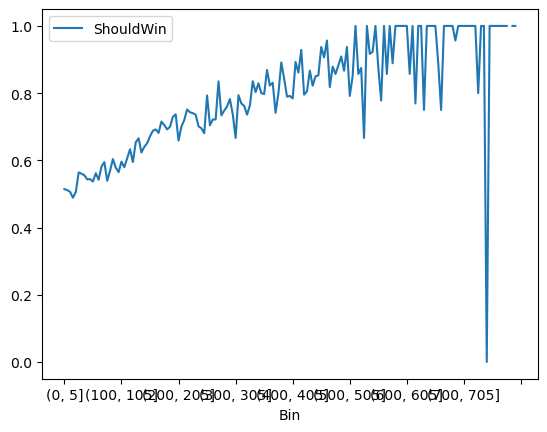

In [44]:
import matplotlib.pyplot as plt

elo_diff.plot(y="ShouldWin")

plt.show()

In [29]:
elo_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 1157
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ShouldWin  719 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB
